# The pydat Library



The main objective of this online package is to drive SDF curves from the USGS gage data. However, it has the capability to create the SDF curves for any data. It also has functions to get the USGS staion list, daily streamflow time-series, and analog streamflows. 

## Example

In this example the main functions of this package will be shown. 

### Step. 1.

Import the packages.

In [84]:
from pydat import pydat
import matplotlib.pyplot as plt

### Step. 2. 

#### valid_station(status='good', state='', basin='', start_date="1800-01-01", end_date=today))

valid_station function gets all of the station information for the stations which are suitable for SDF curve calculation or all of the stations available in a given state or basin and time period.  

In [85]:
station_names =  pydat.valid_station(state='OH')

station_names.head()

,agency_cd,site_no,station_nm,site_tp_cd,dec_lat_va,dec_long_va,coord_acy_cd,dec_coord_datum_cd,alt_va,alt_acy_va,...,stat_cd,ts_id,loc_web_ds,medium_grp_cd,parm_grp_cd,srs_id,access_cd,begin_date,end_date,count_nu
0,USGS,03086500,Mahoning River at Alliance OH,ST,40.932836,-81.094541,S,NAD83,1034.79,0.10,...,3,108591,NaN,wat,NaN,1645423,0,1941-09-01,1993-09-29,19022
1,USGS,03089500,Mill Creek near Berlin Center OH,ST,41.000336,-80.968424,S,NAD83,1032.90,0.01,...,3,108600,NaN,wat,NaN,1645423,0,1941-10-01,1971-10-04,10961
2,USGS,03091500,Mahoning River at Pricetown OH,ST,41.131446,-80.971202,S,NAD83,904.77,0.10,...,3,108605,NaN,wat,NaN,1645423,0,1929-08-01,2023-02-23,34175
3,USGS,03092000,Kale Creek near Pricetown OH,ST,41.139779,-80.995092,S,NAD83,914.70,0.01,...,3,108609,NaN,wat,NaN,1645423,0,1941-05-01,1993-09-29,19145
4,USGS,03092500,West Branch Mahoning River near Newton Falls OH,ST,41.171723,-81.020927,S,NAD83,912.20,0.01,...,3,108618,NaN,wat,NaN,1645423,0,1926-10-01,1981-10-02,20091


### Step. 3. 

#### daily_data(site='', start_date="1800-01-01", end_date=today)

daily_data function provides the daily mean streamflow data from the USGS website for a given date or from 1800 until the current day.   
 
- The site parameter asks for site number.
- The start_date parameter asks for the start of the time-series.
- The end_date parameter asks for the end of the time-series.

In [99]:
daily_stream = pydat.daily_data(site="03098600")

daily_stream.head()

,Datetime,USGS_flow,variable,USGS_ID,measurement_unit,qualifiers
0,1987-10-01 00:00:00+00:00,738.0,streamflow,"=""03098600""",ft³/s,A
1,1987-10-02 00:00:00+00:00,619.0,streamflow,"=""03098600""",ft³/s,A
2,1987-10-03 00:00:00+00:00,570.0,streamflow,"=""03098600""",ft³/s,A
3,1987-10-04 00:00:00+00:00,521.0,streamflow,"=""03098600""",ft³/s,A
4,1987-10-05 00:00:00+00:00,490.0,streamflow,"=""03098600""",ft³/s,A


### Step. 4. 

#### sdf_creator(site='03098600', duration='all', figure=True, length='optimal')

sdf_creator function does the calculation for the SDF curves and then plot it based on the user's preferance. 
- The duration parameter asks whether it should calculate the SDF curves for the all (2 to 10) duration or any other length.
- The figure parameter asks whether it should plot the SDF curve or not.
- The length parameter asks whether it should do the calculation based on the best data period.

It has three outputs:
- SDF curve results.
- Streamflow for the station.
- Plot file.

Here it will give the SDF curves for all station '03098600', all the durations, and the optimal length. Also, it will show the figure. 

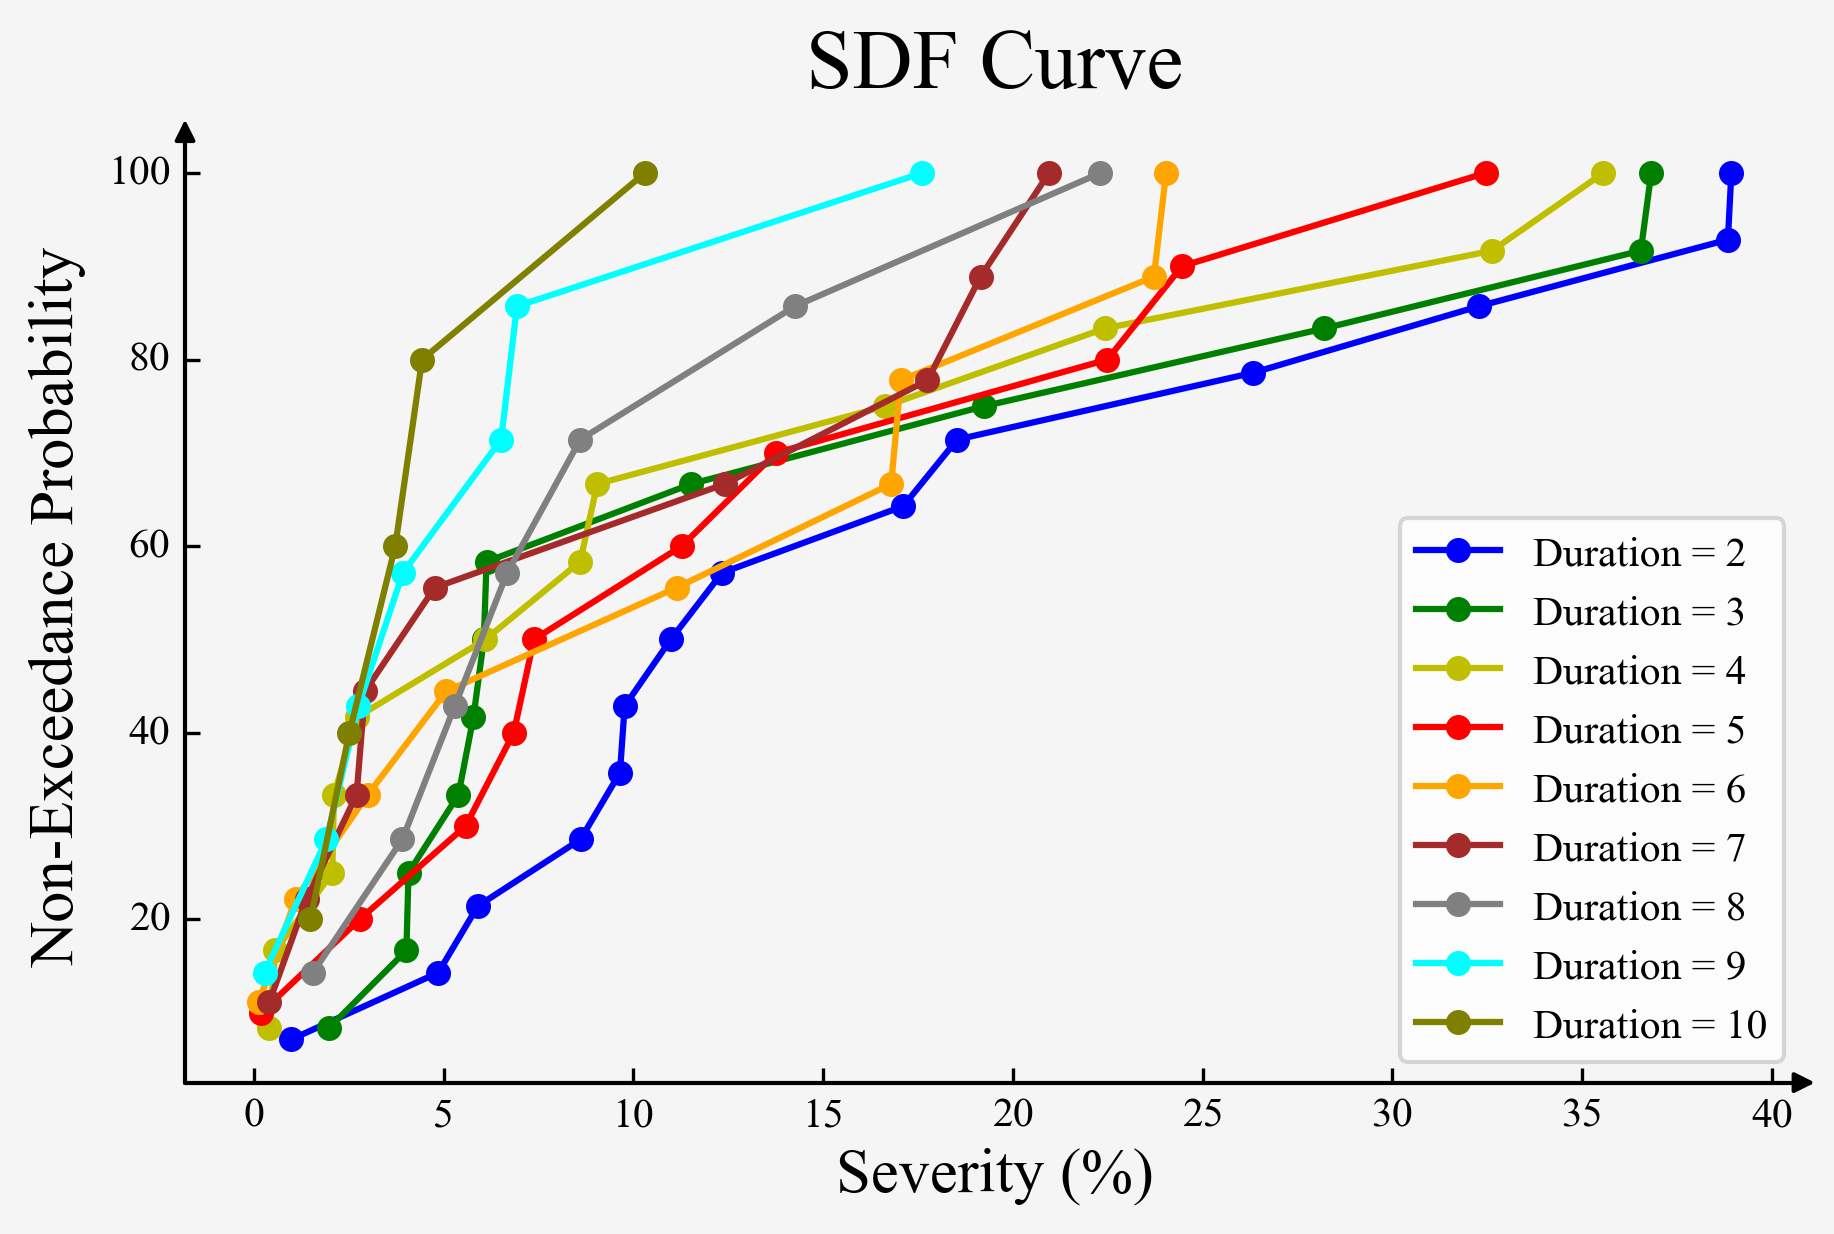

In [87]:
all_sdf, all_streamflow, all_fig = pydat.sdf_creator(site='03098600', duration='all', figure=True, length='optimal')

In [88]:
# The SDF curve results.
all_sdf.head()

Duration = 2                                                          \
          Date   Flow_(cfs) Mean_Flow_(cfs) Severity_(cfs) Probability   
0       1996.0  1348.666667     1014.619635     -17.109113   64.285714   
1       1998.0   978.805479     1211.942466      -0.988525    7.142857   
2       1999.0   825.016438      901.910959     -26.317019   78.571429   
3       2000.0   832.852459      828.934449     -32.278945   85.714286   
4       2001.0   662.104110      747.478284     -38.933630  100.000000   

  Duration = 3                                                          ...  \
          Date   Flow_(cfs) Mean_Flow_(cfs) Severity_(cfs) Probability  ...   
0       1997.0  1445.079452     1158.106240      -5.386757   33.333333  ...   
1       1999.0   825.016438     1082.967123     -11.525361   66.666667  ...   
2       2000.0   832.852459      878.891459     -28.197632   83.333333  ...   
3       2001.0   662.104110      773.324336     -36.822097  100.000000  ...   
4       2002.0   835.095890      776.684153     -36.547612   91.666667  ...   

  Duration = 9                                                          \
          Date   Flow_(cfs) Mean_Flow_(cfs) Severity_(cfs) Probability   
0       2003.0  1468.561644     1008.528305     -17.606753  100.000000   
1       2004.0  1902.647541     1144.314409      -6.513502   71.428571   
2       2005.0  1633.901370     1176.007154      -3.924315   57.142857   
3       2006.0  1114.065753     1139.227854      -6.929056   85.714286   
4       2007.0  1531.624658     1200.652207      -1.910900   28.571429   

  Duration = 10                                                          
           Date   Flow_(cfs) Mean_Flow_(cfs) Severity_(cfs) Probability  
0        2004.0  1902.647541     1097.940228     -10.302111       100.0  
1        2005.0  1633.901370     1193.273105      -2.513747        40.0  
2        2006.0  1114.065753     1169.813014      -4.430355        80.0  
3        2007.0  1531.624658     1178.467534      -3.723310        60.0  
4        2018.0  1345.435616     1205.848763      -1.486359        20.0  

[5 rows x 45 columns]

In [89]:
# The streamflow resutls.
all_streamflow.head()

,Datetime,USGS_flow,variable,USGS_ID,measurement_unit,qualifiers
2557,1994-10-01 00:00:00+00:00,554.0,streamflow,"=""03098600""",ft³/s,A
2558,1994-10-02 00:00:00+00:00,578.0,streamflow,"=""03098600""",ft³/s,A
2559,1994-10-03 00:00:00+00:00,435.0,streamflow,"=""03098600""",ft³/s,A
2560,1994-10-04 00:00:00+00:00,355.0,streamflow,"=""03098600""",ft³/s,A
2561,1994-10-05 00:00:00+00:00,324.0,streamflow,"=""03098600""",ft³/s,A


Here it will give the SDF curves for all station '03098600', 2 and 3 year durations, and the data length. Also, it will show the figure. 

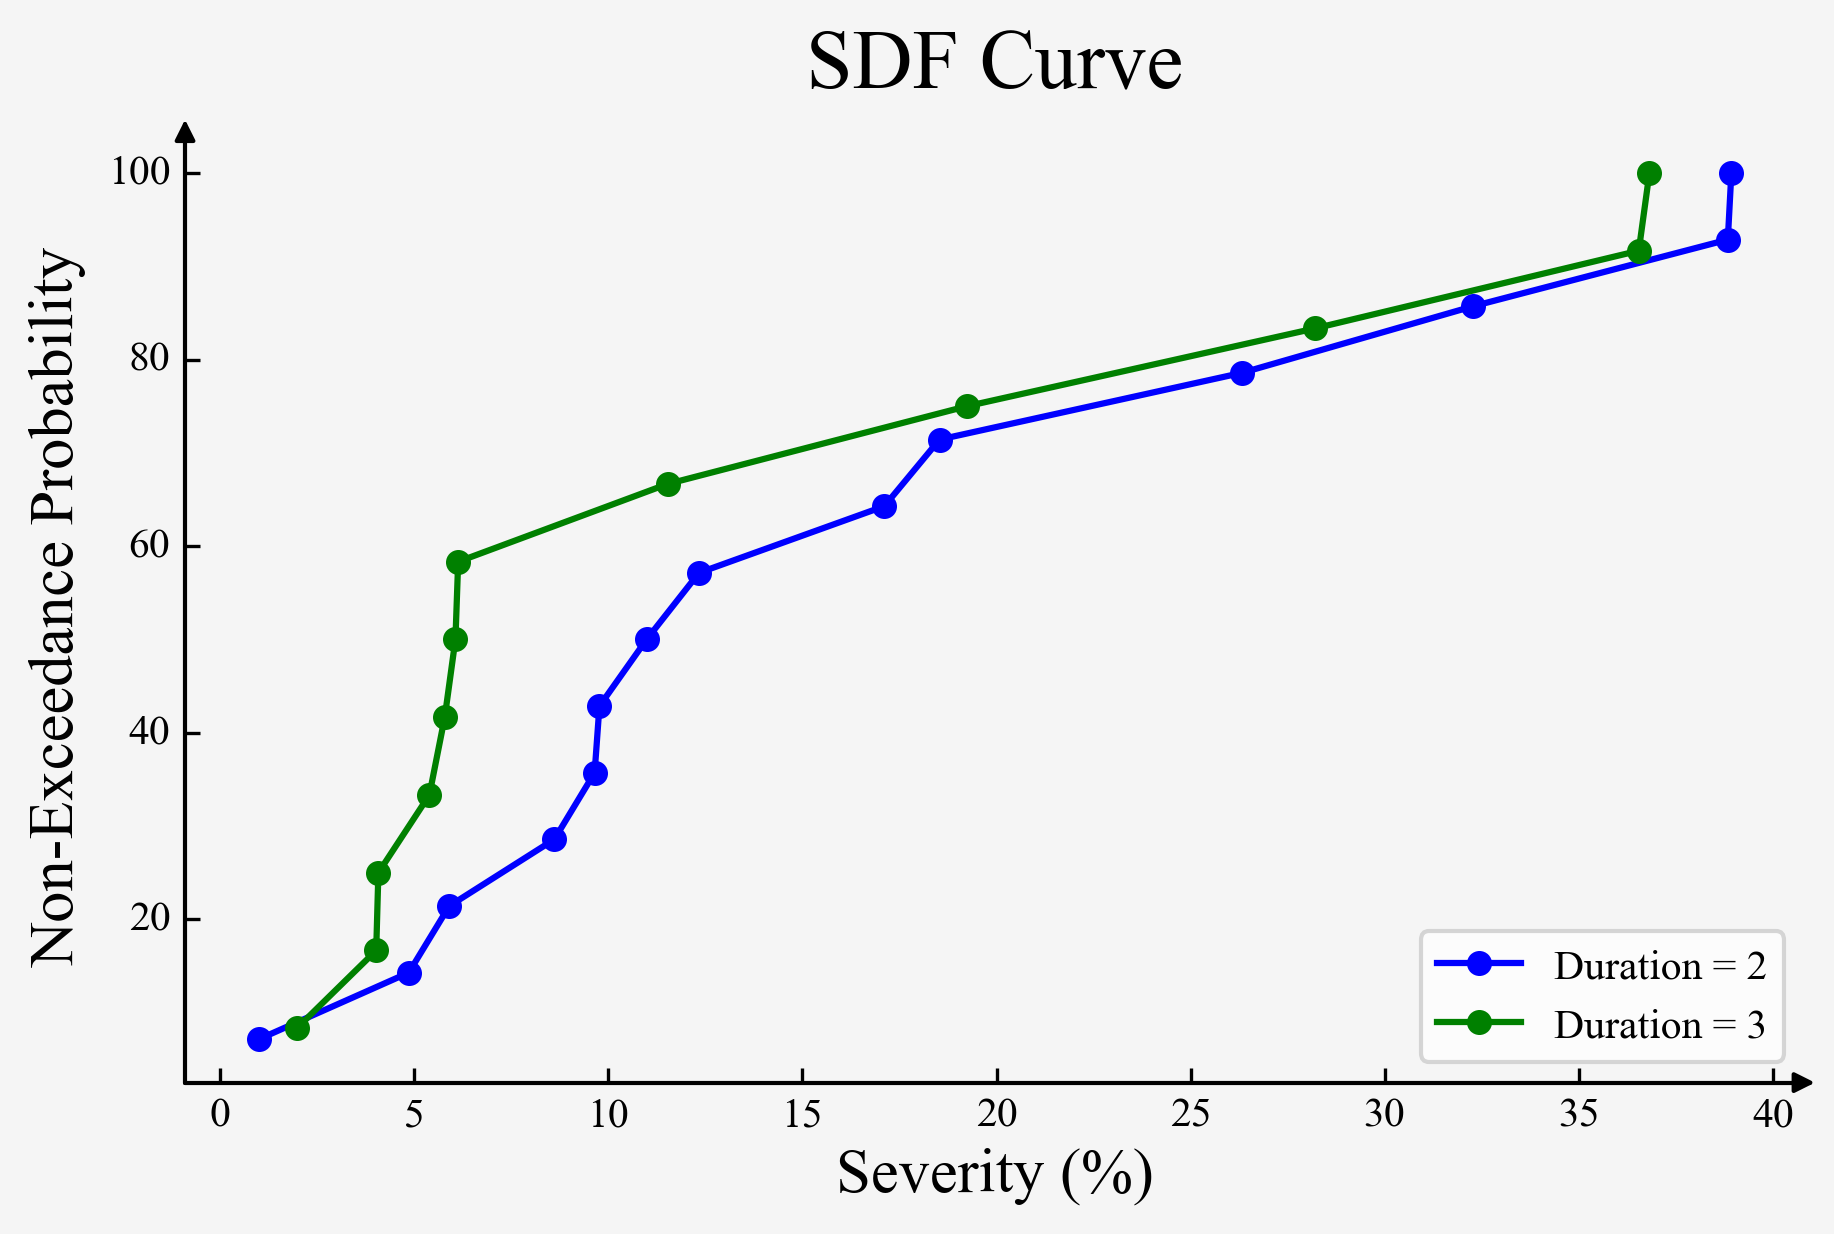

In [90]:
part_sdf_1, part_streamflow_1, part_fig_1 = pydat.sdf_creator(site='03098600', duration='2,3', figure=True)

Here it will give the SDF curves for all station '03098600', 5, 6, and 7 year durations, and the data length. Also, it will NOT show the figure. 

In [91]:
part_sdf_2, part_streamflow_2, part_fig_2 = pydat.sdf_creator(site='03098600', duration='5,6,7', figure=False)

In [92]:
# The SDF curve results.
part_sdf_2.head()

Duration = 5                                                          \
          Date   Flow_(cfs) Mean_Flow_(cfs) Severity_(cfs) Probability   
0       1999.0   825.016438     1055.628128     -13.758862        70.0   
1       2000.0   832.852459     1086.084099     -11.270715        60.0   
2       2001.0   662.104110      948.771588     -22.488669        80.0   
3       2002.0   835.095890      826.774875     -32.455375       100.0   
4       2003.0  1468.561644      924.726108     -24.453100        90.0   

  Duration = 6                                                          \
          Date   Flow_(cfs) Mean_Flow_(cfs) Severity_(cfs) Probability   
0       2000.0   832.852459     1018.498850     -16.792194   66.666667   
1       2001.0   662.104110     1015.420768     -17.043663   77.777778   
2       2002.0   835.095890      929.825638     -24.036487  100.000000   
3       2003.0  1468.561644      933.739337     -23.716751   88.888889   
4       2004.0  1902.647541     1087.713014     -11.137638   55.555556   

  Duration = 7                                                          
          Date   Flow_(cfs) Mean_Flow_(cfs) Severity_(cfs) Probability  
0       2001.0   662.104110      967.585315     -20.951653  100.000000  
1       2002.0   835.095890      989.660071     -19.148222   88.888889  
2       2003.0  1468.561644     1006.787925     -17.748936   77.777778  
3       2004.0  1902.647541     1072.154795     -12.408691   66.666667  
4       2005.0  1633.901370     1165.739922      -4.763112   55.555556

In [93]:
# The streamflow resutls.
part_streamflow_2.head()

,Datetime,USGS_flow,variable,USGS_ID,measurement_unit,qualifiers
2557,1994-10-01 00:00:00+00:00,554.0,streamflow,"=""03098600""",ft³/s,A
2558,1994-10-02 00:00:00+00:00,578.0,streamflow,"=""03098600""",ft³/s,A
2559,1994-10-03 00:00:00+00:00,435.0,streamflow,"=""03098600""",ft³/s,A
2560,1994-10-04 00:00:00+00:00,355.0,streamflow,"=""03098600""",ft³/s,A
2561,1994-10-05 00:00:00+00:00,324.0,streamflow,"=""03098600""",ft³/s,A


### Step. 5. 

#### streamflow_generator(site='', duration='', figure=False)

sdf_creator function does the calculation for the SDF curves and then plot it based on the user's preferance. 
- The site parameter asks for the site number.
- The duration parameter asks the duration length which can only be one number.
- The figure parameter asks whether the plot for the SDF curve is needed or not.

It has three outputs:
- The years that have analog streamflows.
- The severity and frequency of the points with streamflow analogs.
- The streamflow analog time-series.

In [94]:
analog_years ,info, streamflow_analog = pydat.streamflow_generator(site='03098600', duration='3', figure=False)

In [95]:
# Analog years info. 
analog_years

,index year,similar year,similar year
0,1997.0,2016.0,0.0
1,1999.0,0.0,0.0
2,2000.0,0.0,0.0
3,2001.0,2002.0,0.0
4,2002.0,0.0,0.0
5,2003.0,0.0,0.0
6,2014.0,2018.0,0.0
7,2015.0,0.0,0.0
8,2016.0,2017.0,2022.0
9,2017.0,2022.0,0.0


In [96]:
# Analog points information. 
info

year  severity   frequency
1997 index_year      1997.0      -5.4   33.333333
     similar_year_1  2016.0      -5.8   41.666667
2001 index_year      2001.0     -36.8  100.000000
     similar_year_1  2002.0     -36.5   91.666667
2014 index_year      2014.0      -4.1   25.000000
     similar_year_1  2018.0      -4.0   16.666667
2016 index_year      2016.0      -5.8   41.666667
     similar_year_1  2017.0      -6.1   50.000000
     similar_year_2  2022.0      -6.1   58.333333
2017 index_year      2017.0      -6.1   50.000000
     similar_year_1  2022.0      -6.1   58.333333

In [97]:
# The analoge streamflow time-seies. 
streamflow_analog['1997'].head()

,Date_index,Flow_cfs_index,Date_similar_1,Flow_cfs_similar_1
0,1994-10-01 00:00:00+00:00,554.0,2013-10-01 00:00:00+00:00,424.0
1,1994-10-02 00:00:00+00:00,578.0,2013-10-02 00:00:00+00:00,403.0
2,1994-10-03 00:00:00+00:00,435.0,2013-10-03 00:00:00+00:00,411.0
3,1994-10-04 00:00:00+00:00,355.0,2013-10-04 00:00:00+00:00,460.0
4,1994-10-05 00:00:00+00:00,324.0,2013-10-05 00:00:00+00:00,505.0


In [98]:
# The analoge streamflow time-seies. 
streamflow_analog['2016'].head()

,Date_index,Flow_cfs_index,Date_similar_1,Flow_cfs_similar_1,Date_similar_2,Flow_cfs_similar_2
0,2013-10-01 00:00:00+00:00,424.0,2014-10-01 00:00:00+00:00,495.0,2019-10-01 00:00:00+00:00,650.0
1,2013-10-02 00:00:00+00:00,403.0,2014-10-02 00:00:00+00:00,491.0,2019-10-02 00:00:00+00:00,596.0
2,2013-10-03 00:00:00+00:00,411.0,2014-10-03 00:00:00+00:00,477.0,2019-10-03 00:00:00+00:00,538.0
3,2013-10-04 00:00:00+00:00,460.0,2014-10-04 00:00:00+00:00,587.0,2019-10-04 00:00:00+00:00,470.0
4,2013-10-05 00:00:00+00:00,505.0,2014-10-05 00:00:00+00:00,529.0,2019-10-05 00:00:00+00:00,367.0
